In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [3]:
df= pd.read_csv('gold_price_daily_oanda_ModifiedColumnsM.csv')

In [4]:
df

,Date,Price,Open,High,Low,Vol.,detail,Change %
0,2023:09:29,1849.960,1864.795,1879.890,1849.720,123.097,-14.835,-0.8%
1,2023:09:28,1849.955,1864.795,1879.890,1849.720,123.097,-14.840,-0.8%
2,2023:09:27,1864.795,1874.835,1879.685,1857.710,137.250,-10.040,-0.54%
3,2023:09:26,1874.835,1900.670,1903.970,1872.580,111.312,-25.835,-1.36%
4,2023:09:25,1900.670,1916.015,1916.840,1899.155,95.895,-15.345,-0.8%
...,...,...,...,...,...,...,...,...
4211,2007:07:06,643.620,641.450,644.920,639.230,14.495,2.170,0.34%
4212,2007:07:05,641.450,650.950,651.900,640.750,12.266,-9.500,-1.46%
4213,2007:07:04,650.950,654.200,654.650,649.150,10.909,-3.250,-0.5%
4214,2007:07:03,654.200,651.950,656.430,650.850,12.608,2.250,0.35%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4216 entries, 0 to 4215
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4216 non-null   object 
 1   Price     4216 non-null   float64
 2   Open      4216 non-null   float64
 3   High      4216 non-null   float64
 4   Low       4216 non-null   float64
 5   Vol.      4216 non-null   float64
 6   detail    4216 non-null   float64
 7   Change %  4216 non-null   object 
dtypes: float64(6), object(2)
memory usage: 263.6+ KB


In [6]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

C:\Users\ap4ga\AppData\Local\Temp\ipykernel_13992\168970463.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: hour must be in 0..23: 2023:09:29, at position 0

In [ ]:
for i in range(4) : 
    print(df['Date'][i].split(':'))

['2023', '09', '29']
['2023', '09', '28']
['2023', '09', '27']
['2023', '09', '26']


In [8]:
count = 0 
import datetime 
for i in df['Date']  : 
    lst_dates = df['Date'][count].split(':') 
    df['Date'][count] = datetime.date(int(lst_dates[0]),int(lst_dates[1]),int(lst_dates[2])) 

    count += 1 

C:\Users\ap4ga\AppData\Local\Temp\ipykernel_13992\3948128082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][count] = datetime.date(int(lst_dates[0]),int(lst_dates[1]),int(lst_dates[2]))
C:\Users\ap4ga\AppData\Local\Temp\ipykernel_13992\3948128082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][count] = datetime.date(int(lst_dates[0]),int(lst_dates[1]),int(lst_dates[2]))
C:\Users\ap4ga\AppData\Local\Temp\ipykernel_13992\3948128082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [9]:
df

,Date,Price,Open,High,Low,detail
0,2023-09-29,1849.960,1864.795,1879.890,1849.720,-14.835
1,2023-09-28,1849.955,1864.795,1879.890,1849.720,-14.840
2,2023-09-27,1864.795,1874.835,1879.685,1857.710,-10.040
3,2023-09-26,1874.835,1900.670,1903.970,1872.580,-25.835
4,2023-09-25,1900.670,1916.015,1916.840,1899.155,-15.345
...,...,...,...,...,...,...
4211,2007-07-06,643.620,641.450,644.920,639.230,2.170
4212,2007-07-05,641.450,650.950,651.900,640.750,-9.500
4213,2007-07-04,650.950,654.200,654.650,649.150,-3.250
4214,2007-07-03,654.200,651.950,656.430,650.850,2.250


In [10]:
NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [11]:
df.head()

,Date,Price,Open,High,Low,detail
0,2023-09-29,1849.960,1864.795,1879.890,1849.720,-14.835
1,2023-09-28,1849.955,1864.795,1879.890,1849.720,-14.840
2,2023-09-27,1864.795,1874.835,1879.685,1857.710,-10.040
3,2023-09-26,1874.835,1900.670,1903.970,1872.580,-25.835
4,2023-09-25,1900.670,1916.015,1916.840,1899.155,-15.345


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum().sum()

0

In [18]:
fig = px.line(y=df.Price, x=df.Date)
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Date", 
                  yaxis_title="Scaled Price",
                  title={'text': "Gold Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [19]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Price[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Price[-test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

NameError: name 'test_size' is not defined

<Figure size 2250x900 with 0 Axes>

In [37]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))

MinMaxScaler()

In [38]:
window_size = 60

In [39]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [40]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


In [41]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [42]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [43]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [44]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [45]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (3896, 60, 1)
y_train Shape:  (3896, 1)
X_test Shape:   (260, 60, 1)
y_test Shape:   (260, 1)


In [46]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model

In [2]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

NameError: name 'define_model' is not defined

In [48]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

9/9 [==============================] - 1s 11ms/step


In [49]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

In [50]:
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.00025476113660261035
Test MAPE: 0.013777391113745393
Test Accuracy: 0.9862226088862546


In [51]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

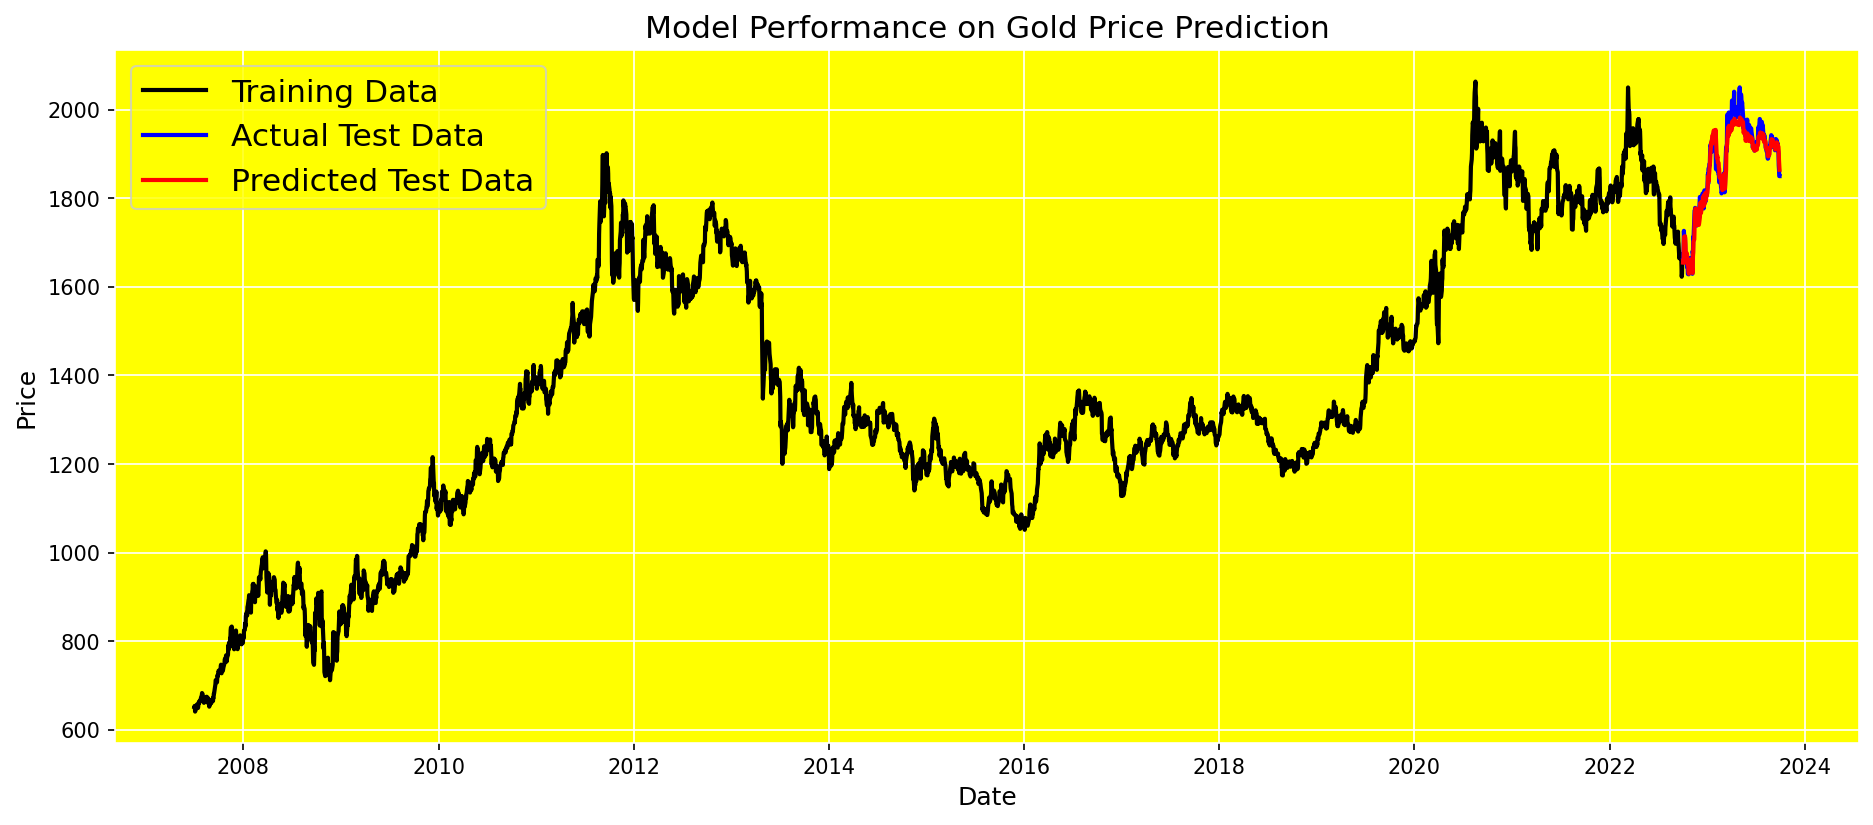

In [52]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()